# Preprocessing: Quarterly Investments (GPDIC1)
This notebook fetches Real Gross Private Domestic Investment (GPDIC1) data from FRED.
**Source:** FRED API (Series ID: GPDIC1)
**Target:** Quarterly frequency, `timestamp` index, `investments` column.

**Steps:**
1. Initialize API & Fetch Data.
2. Transform to time series format (2 columns).
3. Data cleaning (Null check, Data types).
4. Set Index and Frequency.
5. Save processed dataset.
6. Visualization check.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import os

# Set plot style
plt.style.use('seaborn-v0_8')

# Define output file path (relative to this notebook in preprocessing/ folder)
output_file = '../datasets/fred_gpdic1_investments_quarterly.csv'

# Ensure output directory exists
os.makedirs(os.path.dirname(output_file), exist_ok=True)

In [2]:
# 1. Initialize API & Fetch Data
api_key = 'fe30d8578b8d6623d97a5f8094f4ae22'
fred = Fred(api_key=api_key)

series_id = 'GPDIC1'
try:
    data = fred.get_series(series_id)
    print(f"Successfully fetched {len(data)} data points for {series_id}.")
except Exception as e:
    print(f"Error fetching data: {e}")

# Get series info to verify units
series_info = fred.get_series_info(series_id)
print(f"Series Title: {series_info['title']}")
print(f"Units: {series_info['units']}")
print(f"Frequency: {series_info['frequency']}")

# Explicit confirmation of units
print(f"\nCONFIRMATION: The data is in '{series_info['units']}'. No further scaling is needed.")

Successfully fetched 315 data points for GPDIC1.
Series Title: Real Gross Private Domestic Investment
Units: Billions of Chained 2017 Dollars
Frequency: Quarterly

CONFIRMATION: The data is in 'Billions of Chained 2017 Dollars'. No further scaling is needed.


In [3]:
# 2. Transform to Time Series Format
# Convert Series to DataFrame
df = data.to_frame(name='investments')
df.index.name = 'timestamp'
df.reset_index(inplace=True)

print("First 5 rows after transformation:")
print(df.head())

First 5 rows after transformation:
   timestamp  investments
0 1947-01-01      227.242
1 1947-04-01      209.836
2 1947-07-01      203.662
3 1947-10-01      243.072
4 1948-01-01      268.012


In [4]:
# 3. Data Cleaning & Type Conversion

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Verify Data Types
print("\nData Types:")
print(df.dtypes)

# Verify timestamp is datetime
if pd.api.types.is_datetime64_any_dtype(df['timestamp']):
    print("\nTimestamp column is correctly datetime object.")
else:
    print("\nWarning: Timestamp column is NOT datetime object.")


Missing Values:
timestamp      0
investments    0
dtype: int64

Data Types:
timestamp      datetime64[ns]
investments           float64
dtype: object

Timestamp column is correctly datetime object.


In [5]:
# 4. Set Index and Frequency

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Set frequency to Quarter Start (QS)
try:
    df = df.asfreq('QS')
    print("\nFrequency set to 'QS' (Quarter Start).")
except Exception as e:
    print(f"\nCould not set frequency: {e}")

# Verify Index
print("\nDataFrame Index Info:")
print(df.index)

# Check for gaps
if df.index.freq == 'QS':
    print("Time series is continuous with Quarterly Start frequency.")
else:
    print("Warning: Time series frequency could not be strictly enforced.")


Frequency set to 'QS' (Quarter Start).

DataFrame Index Info:
DatetimeIndex(['1947-01-01', '1947-04-01', '1947-07-01', '1947-10-01',
               '1948-01-01', '1948-04-01', '1948-07-01', '1948-10-01',
               '1949-01-01', '1949-04-01',
               ...
               '2023-04-01', '2023-07-01', '2023-10-01', '2024-01-01',
               '2024-04-01', '2024-07-01', '2024-10-01', '2025-01-01',
               '2025-04-01', '2025-07-01'],
              dtype='datetime64[ns]', name='timestamp', length=315, freq='QS-JAN')
Time series is continuous with Quarterly Start frequency.


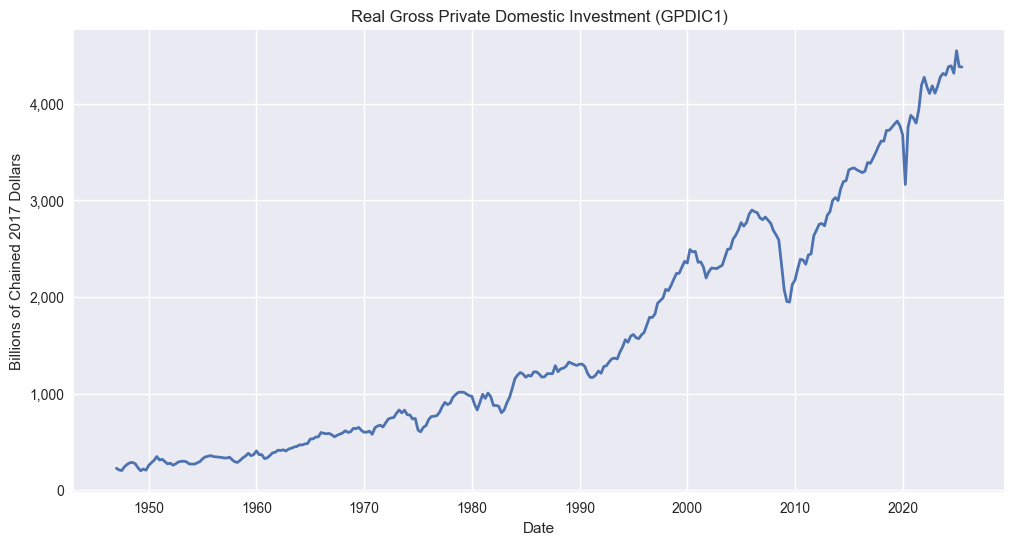

In [11]:
# 6. Visualization Check
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['investments'], linestyle='-', linewidth=2)
plt.title(f'Real Gross Private Domestic Investment ({series_id})')
plt.xlabel('Date')
plt.ylabel('Billions of Chained 2017 Dollars')
plt.grid(True)

# Format y-axis
import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()